<a href="https://colab.research.google.com/github/DorcasPopoola/CIND820/blob/main/Final_Result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import numpy as np
import time 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier


import warnings
warnings.filterwarnings("ignore")

In [129]:
from google.colab import drive
drive.mount('/content/assignment')

Mounted at /content/assignment


# Exploratory Data Analysis 

In [130]:
# Loading the dataset into Python
cc_dataset = pd.read_csv('/content/assignment/MyDrive/Colab Notebooks/Credit_Card_Transactions.csv')

cc_dataset.head()

,Transaction ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [131]:
#checking for the shape of the dataset. Checks the numbers of rows and columns in the dataset.
cc_dataset.shape

(284807, 32)

In [132]:
#Function will show datatypes and null/non-null distribution
cc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  284807 non-null  int64  
 1   Time            284807 non-null  float64
 2   V1              284807 non-null  float64
 3   V2              284807 non-null  float64
 4   V3              284807 non-null  float64
 5   V4              284807 non-null  float64
 6   V5              284807 non-null  float64
 7   V6              284807 non-null  float64
 8   V7              284807 non-null  float64
 9   V8              284807 non-null  float64
 10  V9              284807 non-null  float64
 11  V10             284807 non-null  float64
 12  V11             284807 non-null  float64
 13  V12             284807 non-null  float64
 14  V13             284807 non-null  float64
 15  V14             284807 non-null  float64
 16  V15             284807 non-null  float64
 17  V16       

In [133]:
#This function allows to see the distribution of numerical values in the dataset.
cc_dataset.describe()

,Transaction ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,142404.000000,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,82216.843396,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,1.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,71202.500000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,142404.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,213605.500000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,284807.000000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [134]:
# Checks for the class distribution of the Target Variable 
classes_cc_dataset= cc_dataset['Class'].value_counts()
nonfraud_transactions = classes_cc_dataset[0]/cc_dataset['Class'].count()*100
fraud_transaction = classes_cc_dataset[1]/cc_dataset['Class'].count()*100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


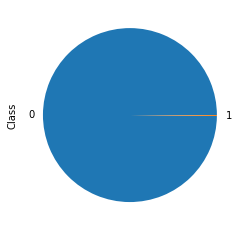

In [135]:
#Target variable in this case is the class variable, this function checks for its distribution in percentage.
#Further shows how imbalance the dataset is. It is important to help visualize the distribution of the fraudulent versus non-fradulent transactions.
print((cc_dataset.groupby('Class')['Class'].count()/cc_dataset['Class'].count())*100)
((cc_dataset.groupby('Class')['Class'].count()/cc_dataset['Class'].count())*100).plot.pie()

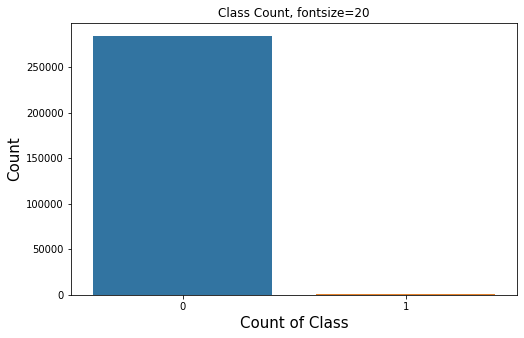

In [136]:
#This function creates a bar plot for the number and percentage of fraudulent vs non-fradulent transactions. 
plt.figure(figsize=(8,5))
sns.countplot(cc_dataset['Class'])
plt.title("Class Count, fontsize=20")
plt.xlabel("Count of Class", fontsize=15)
plt.ylabel("Count",  fontsize=15)
plt.show()

In [137]:
#This code checks for correlation 
cc_corr = cc_dataset.corr()
cc_corr

,Transaction ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Transaction ID,1.000000,0.993379,1.118645e-01,-1.185985e-03,-4.046348e-01,-1.022820e-01,1.686105e-01,-6.285766e-02,8.154183e-02,-3.488119e-02,...,4.012628e-02,1.340984e-01,5.076183e-02,-1.453650e-02,-2.277103e-01,-3.791457e-02,-4.538311e-03,-9.393538e-03,-0.015808,-0.011692
Time,0.993379,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.111865,0.117396,1.000000e+00,3.777823e-12,-2.118614e-12,-1.733159e-13,-3.473231e-12,-1.306165e-13,-1.116494e-13,2.114527e-12,...,-3.276238e-12,2.281863e-12,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227709,-0.101347
V2,-0.001186,-0.010593,3.777823e-12,1.000000e+00,2.325661e-12,-2.314981e-12,-1.831952e-12,9.438444e-13,5.403436e-12,2.133785e-14,...,2.280202e-12,-2.548560e-13,-4.856120e-12,6.431308e-13,-9.423730e-13,-4.129100e-13,-9.856545e-13,2.525513e-12,-0.531409,0.091289
V3,-0.404635,-0.419618,-2.118614e-12,2.325661e-12,1.000000e+00,2.046235e-13,-4.032993e-12,-1.574471e-13,3.405586e-12,-1.272385e-12,...,6.736294e-13,-8.909339e-13,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210880,-0.192961
V4,-0.102282,-0.105260,-1.733159e-13,-2.314981e-12,2.046235e-13,1.000000e+00,-2.552389e-13,1.084041e-12,8.135064e-13,7.334818e-13,...,-2.696370e-12,4.347776e-13,-4.160969e-12,-2.368743e-12,1.619944e-12,-3.043100e-13,-1.456066e-12,-2.832372e-12,0.098732,0.133447
V5,0.168610,0.173072,-3.473231e-12,-1.831952e-12,-4.032993e-12,-2.552389e-13,1.000000e+00,-6.934789e-14,1.573956e-11,-2.038243e-12,...,-1.751796e-12,7.095269e-13,3.616075e-12,-2.808776e-13,1.451126e-12,-1.896141e-13,-2.124559e-12,1.010196e-11,-0.386356,-0.094974
V6,-0.062858,-0.063016,-1.306165e-13,9.438444e-13,-1.574471e-13,1.084041e-12,-6.934789e-14,1.000000e+00,-2.798968e-12,-5.446480e-13,...,1.476858e-12,-1.144797e-12,-1.527842e-12,1.551854e-12,-2.723707e-12,3.351239e-12,1.481307e-12,-6.069227e-13,0.215981,-0.043643
V7,0.081542,0.084714,-1.116494e-13,5.403436e-12,3.405586e-12,8.135064e-13,1.573956e-11,-2.798968e-12,1.000000e+00,5.528803e-12,...,2.788246e-12,-8.133209e-13,-4.293094e-12,-2.553518e-12,-7.406970e-13,-4.476467e-12,-1.328637e-11,2.958679e-13,0.397311,-0.187257
V8,-0.034881,-0.036949,2.114527e-12,2.133785e-14,-1.272385e-12,7.334818e-13,-2.038243e-12,-5.446480e-13,5.528803e-12,1.000000e+00,...,-4.022440e-12,-2.679560e-12,9.013064e-13,-1.074365e-12,-3.268979e-12,1.043839e-12,-3.499804e-12,1.866598e-12,-0.103079,0.019875


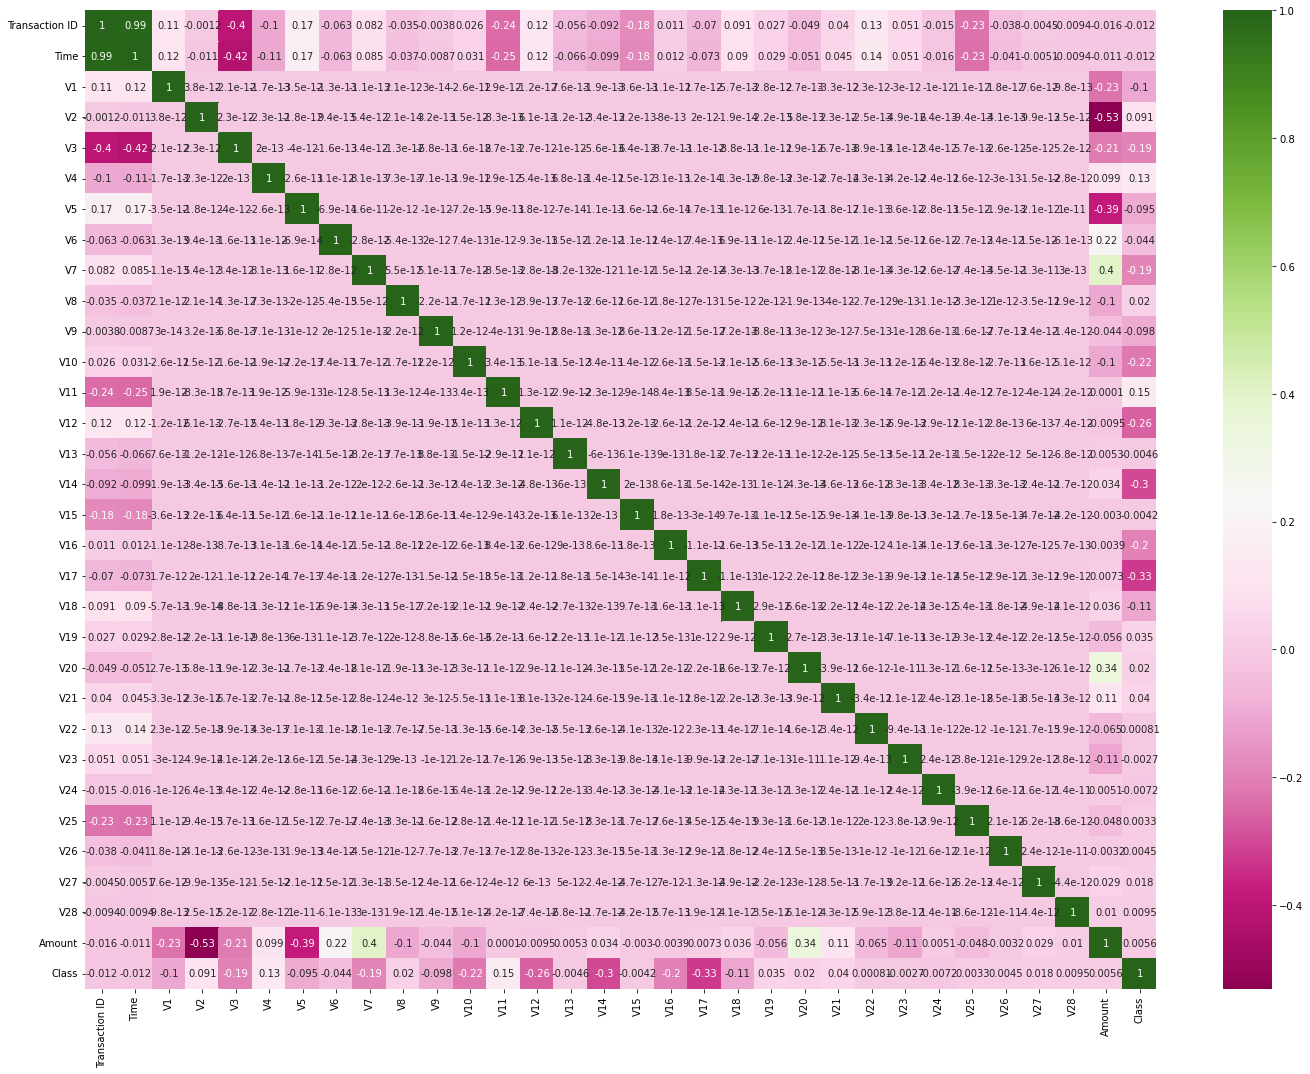

In [ ]:
# Checks for the correlation in heatmap 
plt.figure(figsize=(24,18))

sns.heatmap(cc_corr, cmap = "PiYG", annot=True)
plt.show()

In [ ]:
# Pandas.Timedelta functions is being used, this function represents a duration, the difference between two times or dates. 
Delta_Time = pd.to_timedelta(cc_dataset['Time'], unit='s')

#Create derived columns Mins and hours 
cc_dataset['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
cc_dataset['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
cc_dataset['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [ ]:
# Drop unnecessary columns 
# We will drop Time, as we have derived the Day/ Hour/Minutes from the time feature column 
cc_dataset.drop('Time', axis = 1, inplace = True)

#We will keep only need column hour, as day/minutes might not be very useful moving forward 
cc_dataset.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)



## Split Dataset into Train and Test Data

In [ ]:
# Splitting the dataset into X and Y
Y = cc_dataset['Class']
X = cc_dataset.drop(['Class'], axis=1)

In [ ]:
# Checking some rows of X
X.head()

,Transaction ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Checking some rows of Y
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
# Splitting the dataset using train test split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=100, test_size=0.20)

In [ ]:
print(np.sum(Y))
print(np.sum(Y_train))
print(np.sum(Y_test))


492
396
96


Plotting the Distribution of the Variable 

In [ ]:
# Accumulating all the column names under one variable
cols = list(X.columns.values)

ValueError: ignored

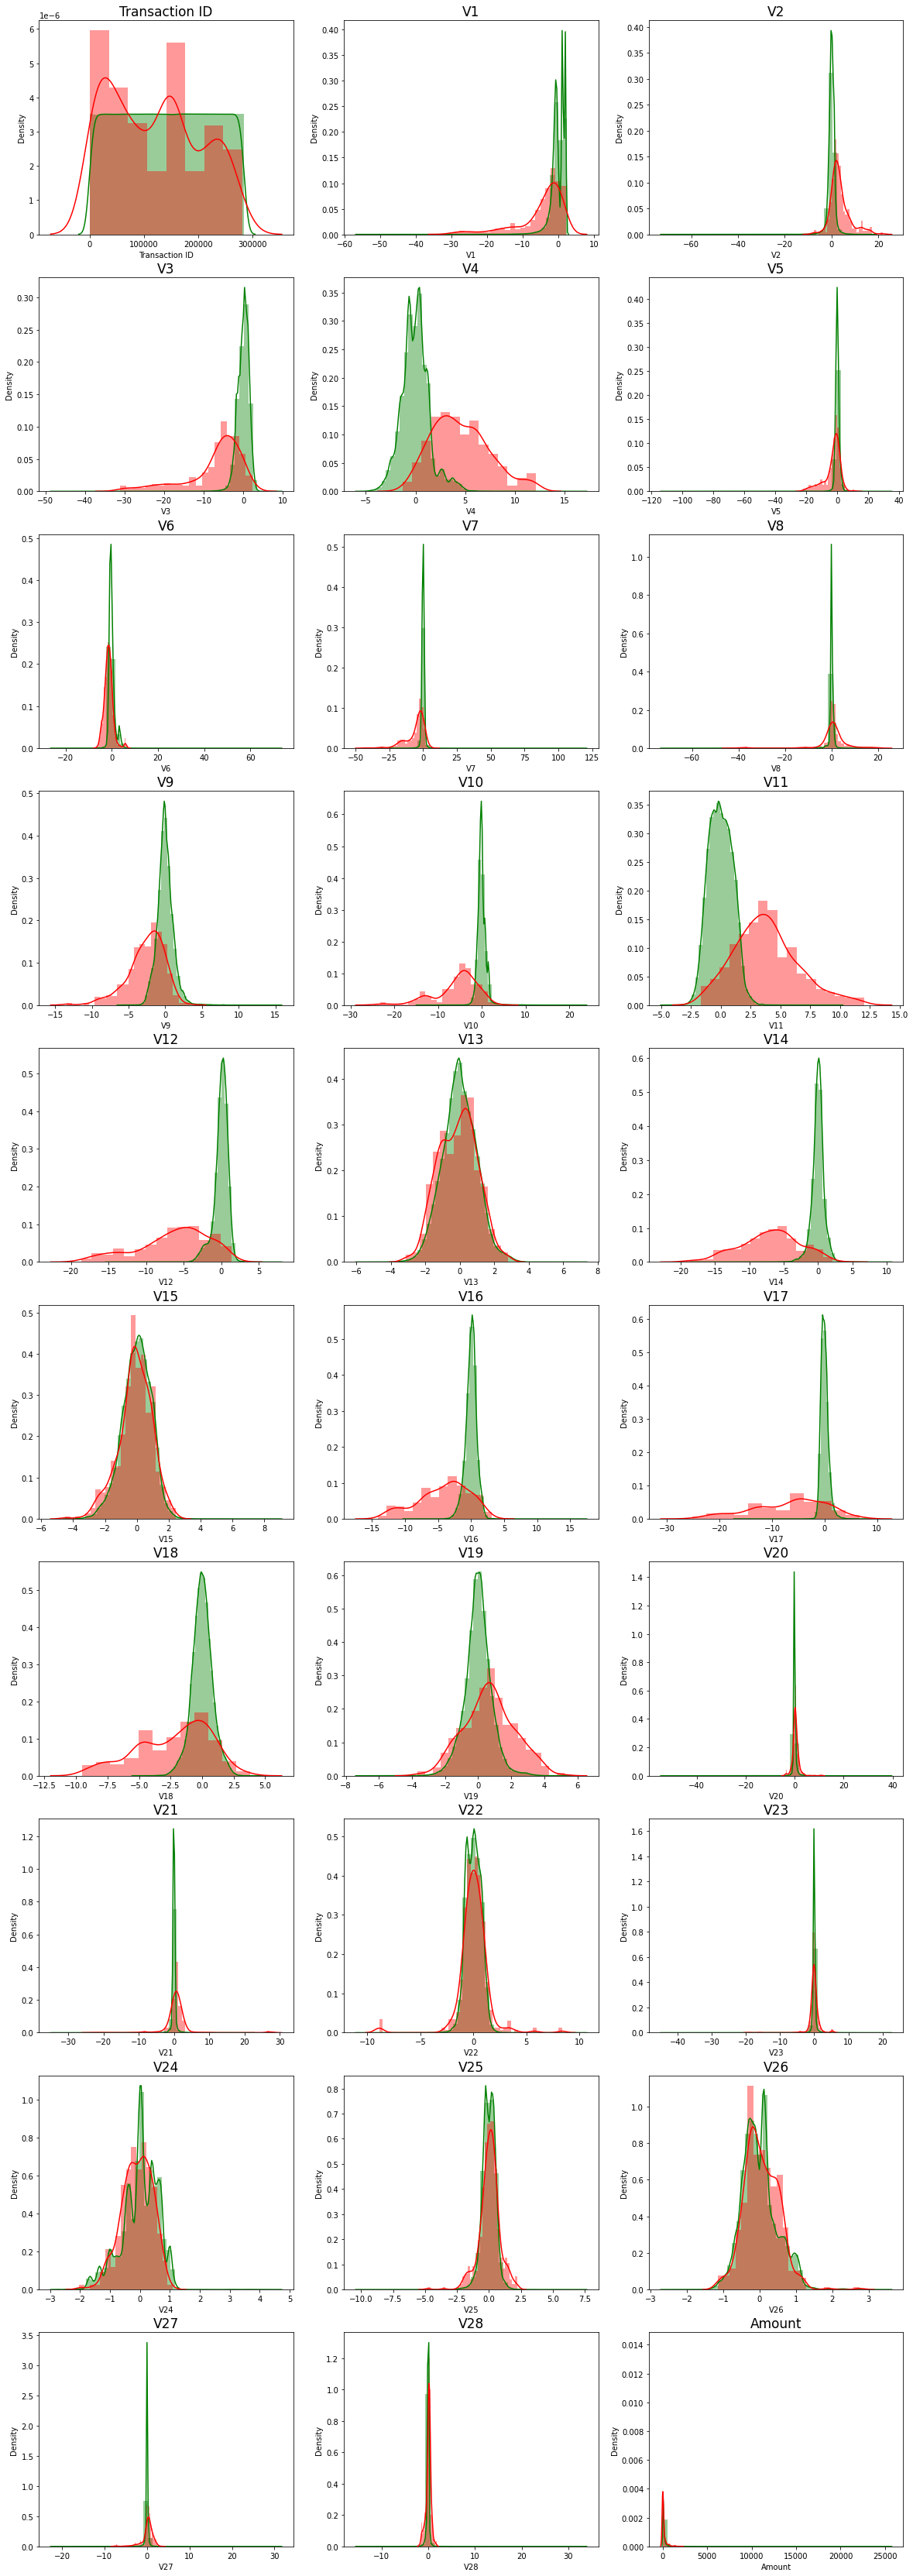

In [ ]:
# Histogram will show the skewness of dataset
nonfraud_transactions = cc_dataset.Class == 0
fraud_transaction = cc_dataset.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3, n+1)
  sns.distplot(X[col][nonfraud_transactions], color='green')
  sns.distplot(X[col][fraud_transaction], color='red')
  plt.title(col, fontsize=17)
plt.show()

# Model Building 

In [ ]:
#Dataframe to store results 
cc_dataset_Results = pd.DataFrame(columns=['Methodology', 'Model','Accuracy', 'roc_value','threshold'])

In [ ]:
# Creates common function to plot confusion matrix 
# This will prevent re-iterations 
def Plot_confusion_matrix(Y_test, p_test):
  cnf_m = confusion_matrix(Y_test, p_test)
  plt.clf()
  plt.imshow(cnf_m, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cnf_m[i][j]),fontsize=12)
  plt.show()

In [ ]:
# Creates common function to fit and predict a Logistic Regression model for both L1 and L2

def buildAndRunLogisticModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )

  searchCV_l1.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_)

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_)  

  #find predicted vallues
  y_pred_l1 = searchCV_l1.predict(X_test)
  y_pred_l2 = searchCV_l2.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
    
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [ ]:
# Creates a commmon function to fit and predict on a KNN model 

def buildAndRunKNNModels(df_Results,Methodology, X_train,y_train, X_test, y_test ):

  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
# Creates common function to fit and predict on a Tree model for both gini and entropy criteria 

def buildAndRunTreeModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

# Cross Validation using RepeatedKFold

In [ ]:
#This code perfroms RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = Y.iloc[train_index], Y.iloc[test_index]

TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     5     14     15 ... 284796 284799 284804]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     6     10     11 ... 284798 284802 284803]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1      4      8 ... 284786 284788 284791]
TRAIN: [     0      1      2 ... 284802 284803 284804] TEST: [     3     12     13 ... 284800 284805 284806]
TRAIN: [     1      3      4 ... 284804 284805 284806] TEST: [     0      2      7 ... 284783 284784 284801]
TRAIN: [     0      3      4 ... 284804 284805 284806] TEST: [     1      2      6 ... 284783 284794 284802]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     3     17     33 ... 284791 284792 284805]
TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0      4      8 ... 284787 284795 284796]
TRAIN: [     0      1      2 ... 284802 284803 284805] TEST: [     5     11     14 ... 284797 284804 284806]
TRAIN: [     0     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.9600075541763331
Max auc_roc for l2: 0.9846301847606043
Parameters for l1 regularisations
[[-1.60354918e-05  9.26305570e-02 -1.22037771e-01 -5.04517344e-01
   3.74547377e-03 -9.42821905e-02 -7.36065137e-03  1.05154833e-01
  -6.88638761e-02 -1.34334727e-01 -8.87632477e-02 -2.41815905e-01
   1.13201096e-01 -1.61272572e-01 -3.56528007e-01 -2.53071425e-01
  -1.54039655e-01 -3.47370305e-01  6.92396084e-02 -1.25016835e-02
   2.11855708e-01  1.51370973e-01  2.81910615e-01  1.07937288e-01
  -4.44955849e-02 -7.03551023e-01  1.30500490e-02 -6.67761052e-02
   8.93593342e-02 -4.84466791e-03 -1.49265165e-01]]
[-1.01608989]
{1: array([[0.48701143, 0.48701143, 0.48701143, 0.48701143, 0.48701143,
        0.44597604, 0.53235656, 0.81472082, 0.92109694, 0.93409541,
        0.90353704, 0.91774896, 0.94454166, 0.92900638, 0.93816883,
        0.93127171, 0.9179446 , 0.95766322, 0.94915476, 0.95676742],
       [0.56967469, 0.56967469, 0

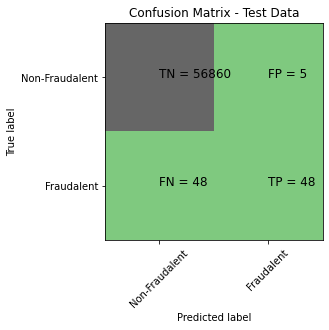

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.91      0.50      0.64        96

    accuracy                           1.00     56961
   macro avg       0.95      0.75      0.82     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9990168711925703
Confusion Matrix


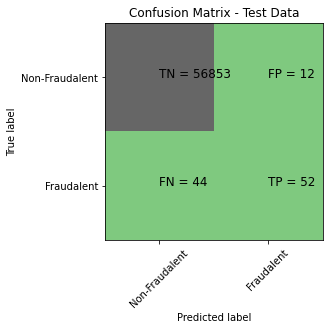

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.81      0.54      0.65        96

    accuracy                           1.00     56961
   macro avg       0.91      0.77      0.82     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9688945309065331
l2 threshold: 0.0016138525056165578
ROC for the test dataset 96.9%


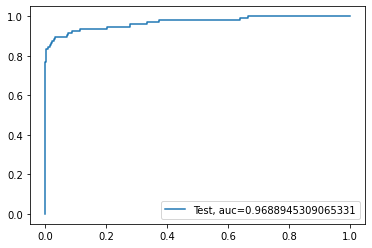

l1 roc_value: 0.8609788534247781
l1 threshold: 0.058106541767689
ROC for the test dataset 86.1%


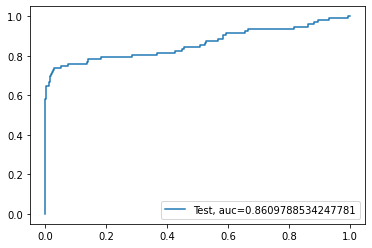

Time Taken by Model: --- 1210.9984722137451 seconds ---
------------------------------------------------------------
KNN Model
model score
0.9984550833026106
Confusion Matrix


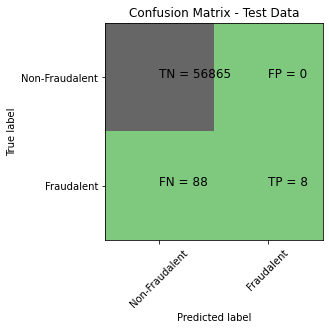

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       1.00      0.08      0.15        96

    accuracy                           1.00     56961
   macro avg       1.00      0.54      0.58     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.6029437410240628
KNN threshold: 0.2
ROC for the test dataset 60.3%


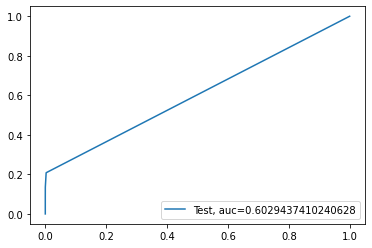

Time Taken by Model: --- 1617.6673512458801 seconds ---
------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9990344270641316
Confusion Matrix


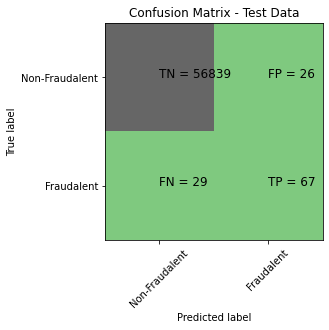

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.72      0.70      0.71        96

    accuracy                           1.00     56961
   macro avg       0.86      0.85      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8487297217093114
Tree threshold: 1.0
ROC for the test dataset 84.9%


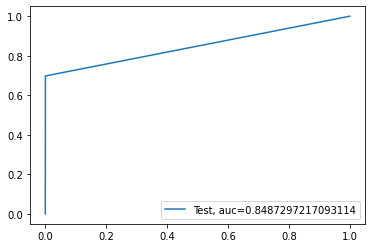

entropy score: 0.9992626533944278
Confusion Matrix


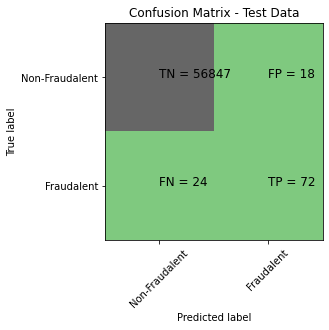

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.80      0.75      0.77        96

    accuracy                           1.00     56961
   macro avg       0.90      0.87      0.89     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8748417304141387
Tree threshold: 1.0
ROC for the test dataset 87.5%


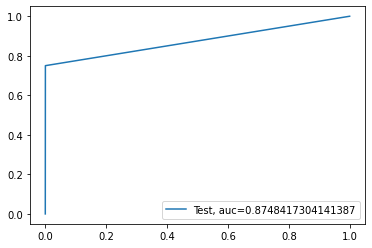

Time Taken by Model: --- 38.951671838760376 seconds ---
------------------------------------------------------------


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
cc_dataset_Results = buildAndRunLogisticModels(cc_dataset_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
cc_dataset_Results = buildAndRunKNNModels(cc_dataset_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
cc_dataset_Results = buildAndRunTreeModels(cc_dataset_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )





In [ ]:
# Checks for the results of the Repeated Cross Validation. 
cc_dataset_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999070,0.968895,0.001614
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999017,0.860979,0.058107
2,RepeatedKFold Cross Validation,KNN,0.998455,0.602944,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999034,0.848730,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999263,0.874842,1.000000


# Building Model with Balancing Classes

In [126]:
# Creating dataframe with Smote and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,Y), 1):
    X_train = X.loc[train_index]
    y_train = Y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = Y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)
  
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.99784162036057
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.

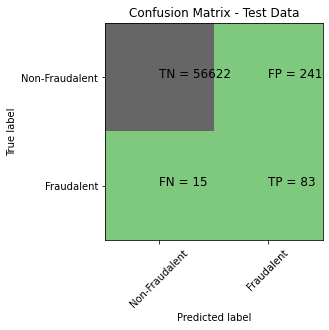

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.26      0.85      0.39        98

    accuracy                           1.00     56961
   macro avg       0.63      0.92      0.70     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


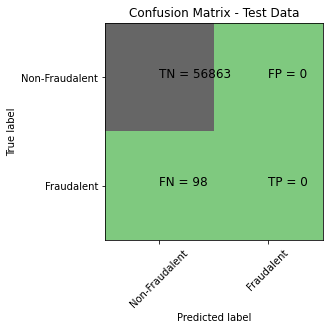

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9824690529008677
l2 threshold: 0.08507458478946749
ROC for the test dataset 98.2%


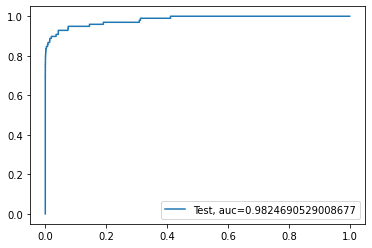

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


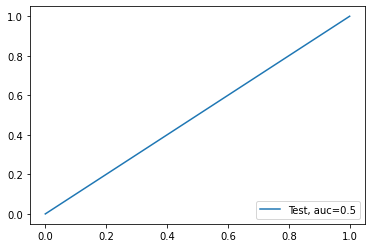

Time Taken by Model: --- 5888.716974258423 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9982795245869981
Confusion Matrix


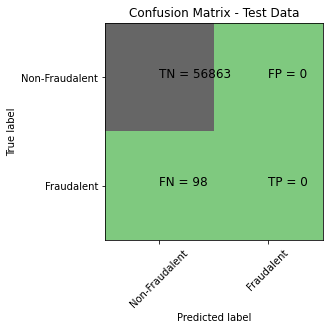

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
cc_dataset_Results = buildAndRunLogisticModels(cc_dataset_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
cc_dataset_Results = buildAndRunKNNModels(cc_dataset_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
cc_dataset_Results = buildAndRunTreeModels(cc_dataset_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


In [138]:
cc_dataset_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999070,0.968895,0.001614
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999017,0.860979,0.058107
2,RepeatedKFold Cross Validation,KNN,0.998455,0.602944,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999034,0.848730,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999263,0.874842,1.000000
5,SMOTE Oversampling with StratifiedKFold CV,Logistic Regression with L2 Regularisation,0.995506,0.982469,0.085075
6,SMOTE Oversampling with StratifiedKFold CV,Logistic Regression with L1 Regularisation,0.998280,0.500000,1.500000
7,SMOTE Oversampling with StratifiedKFold CV,KNN,0.998280,0.500000,1.000000
8,SMOTE Oversampling with StratifiedKFold CV,Tree Model with gini criteria,0.997876,0.499798,2.000000
9,SMOTE Oversampling with StratifiedKFold CV,Tree Model with entropy criteria,0.998332,0.856554,1.000000
